# Matrices de adyacencia para tiempo y distancia

Con el diccionario de diccionarios que se obtuvo se pueden extraer dos matrices de adyacencia con pesos para representar el tiempo y la distancia de conducción entre todos los puntos que forman el grafo simplificado.

In [6]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Se retoma el diccionario del objeto pickle.

In [15]:
with open('Consultas_googleApi.pickle', 'rb') as handle:
    recuperacion = pickle.load(handle)

Las llaves del diccionario son las coordenadas de los nodos del modelo.

In [16]:
recuperacion.keys()

dict_keys([(-0.20248826666666667, -78.50040125), (-0.21495733333333333, -78.49079993333334), (-0.20644891999999998, -78.49941296), (-0.21103442500000003, -78.4981667125), (-0.20301313333333335, -78.50411983333333), (-0.2126993, -78.491860325), (-0.21029951428571433, -78.49388817142858), (-0.20728062500000002, -78.498081775), (-0.19816061999999998, -78.49596283), (-0.2083583, -78.49622876666668), (-0.20041799999999999, -78.50095725), (-0.211726575, -78.5013562), (-0.2042497, -78.5021648), (-0.21373910000000002, -78.4978411), (-0.20246205, -78.5013519), (-0.197645025, -78.50026352500001), (-0.20381238333333332, -78.5007766), (-0.20952433333333334, -78.49254119999999), (-0.20430165, -78.50571395), (-0.20557, -78.4919239), (-0.21137536666666668, -78.49542793333333), (-0.20020670000000002, -78.49098605), (-0.20768993333333333, -78.49984930000001), (-0.21096573333333335, -78.49978503333334), (-0.20872455454545458, -78.49558266363637), (-0.214803425, -78.500259975), (-0.21235037499999998, -78

El diccionario que almacena cada coordenada es una lista de diccionarios con información bastante variada.

In [6]:
recuperacion[(-0.20248826666666667,
  -78.50040125)]

[{'destination_addresses': ['Perez Guerrero Y Versalles, Quito, Ecuador'],
  'origin_addresses': ['San Gregorio &, Quito 170129, Ecuador'],
  'rows': [{'elements': [{'distance': {'text': '0.2 km', 'value': 209},
      'duration': {'text': '1 min', 'value': 62},
      'status': 'OK'}]}],
  'status': 'OK'},
 {'destination_addresses': ['Av. 10 de Agosto 170526, Quito 170129, Ecuador'],
  'origin_addresses': ['San Gregorio &, Quito 170129, Ecuador'],
  'rows': [{'elements': [{'distance': {'text': '0.3 km', 'value': 257},
      'duration': {'text': '1 min', 'value': 64},
      'status': 'OK'}]}],
  'status': 'OK'}]

Se recuperan los datos de la matriz de adyacencia para poder generar las nuevas matrces.

In [9]:
data_point = pd.read_csv('centros_googleApi.csv')

In [10]:
data_point.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,cluster_point
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"(-78.50040125, -0.20248826666666667)"
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(-78.49079993333334, -0.21495733333333333)"
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"(-78.49941296, -0.20644891999999998)"
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(-78.4981667125, -0.21103442500000003)"
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(-78.50411983333333, -0.20301313333333335)"


In [11]:
adj_matrix = data_point.iloc[:,1:-1].values

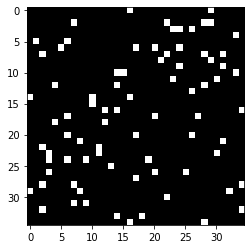

In [13]:
plt.imshow(adj_matrix,'gray')

De los datos almacenados nos interesa obtener la característica `distance` y `duration`.

In [18]:
for point in recuperacion[(-0.20248826666666667, -78.50040125)]:
    print(point['rows'])

[{'elements': [{'distance': {'text': '0.2 km', 'value': 209}, 'duration': {'text': '1 min', 'value': 62}, 'status': 'OK'}]}]
[{'elements': [{'distance': {'text': '0.3 km', 'value': 257}, 'duration': {'text': '1 min', 'value': 64}, 'status': 'OK'}]}]


Los datos se pueden obtener al pasar una serie de parámetros para llegar al diccionario correcto.

In [19]:
point['rows'][0]['elements'][0]['distance']['text']

'0.3 km'

In [20]:
point['rows'][0]['elements'][0]['duration']['text']

'1 min'

Se puede observar que la información se guarda con un número seguido de la unidad. Debido a ello, es necesario separar la cantidad en otra variable.

In [21]:
numero,unidad = point['rows'][0]['elements'][0]['duration']['text'].split()

In [22]:
int(numero)

1

Al saber cómo extraer la información del diccionario de diccionarios, se puede generar dos matrices para el tiempo y la distancia.

In [164]:
time_matrix = np.zeros((35,35))
distance_matrix = np.zeros((35,35))

#verificar que siempre se use la misma unidad de tiempo
unidades_tiempo = []
#verificar que siempre se use la misma medida de distancia
unidades_distancia = []

La matriz de adyacencia original se utiliza para poder almacenar la información en los índices correctos de las nuevas matrices.

In [165]:
idx_vecinos = np.where(adj_matrix[0]==1)[0]
idx_vecinos

array([16, 29], dtype=int64)

Se realiza una primera aproximación recorriendo todos los nodos para encontrar la información de conexión con sus vecinos, sin embargo, las unidades de distancia que se manejan son distintas.

In [166]:
#recorro cada nodo
for i,key in enumerate(recuperacion):
    #posicion en la adj_matrix
    idx_vecinos = np.where(adj_matrix[i]==1)[0]
    #recorro los vecinos
    for j,point in enumerate(recuperacion[key]):
        idx_vecino = idx_vecinos[j]
       
        #almaceno el tiempo
        numero,unidad = point['rows'][0]['elements'][0]['duration']['text'].split()        
        time_matrix[i][idx_vecino] = float(numero)
        
        #almaceno la unidad
        if(unidad not in unidades_tiempo):
            unidades_tiempo.append(unidad)
            print(point['rows'][0]['elements'][0]['duration']['text'])
        
        #almaceno la distancia
        numero,unidad = point['rows'][0]['elements'][0]['distance']['text'].split()
        distance_matrix[i][idx_vecino] = float(numero)
        
        #almaceno la unidad
        if(unidad not in unidades_distancia):
            unidades_distancia.append(unidad)
            print(point['rows'][0]['elements'][0]['distance']['text'])

1 min
0.2 km
2 mins
81 m


Por otro lado, se puede verificar que la matriz de tiempo mantiene las conexiones y esta matriz puede darse por terminada. La intensidad de la matriz de tiempo refleja el peso que existe en las conexiones.

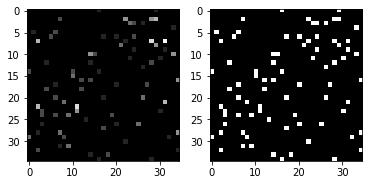

In [178]:
plt.subplot(1,2,1)
plt.imshow(time_matrix,'gray')
plt.subplot(1,2,2)
plt.imshow(adj_matrix,'gray')

Ya que hay distancias medidas en metros y en kilómetros, hay que estandarizar.

In [161]:
unidades_distancia

['km', 'm']

Las unidades de tiempo no tienen problema.

In [162]:
unidades_tiempo

['min', 'mins']

Se define una función descriptiva para pasar kilómetros a metros.

In [168]:
def km2m(kms):
    return kms * 1000

In [170]:
km2m(3)

3000

Se genera una nueva matriz de distancia donde el cambio de unidad será tomado en cuenta.

In [190]:
distance_matrix = np.zeros((35,35))

#recorro cada nodo
for i,key in enumerate(recuperacion):
    #posicion en la adj_matrix
    idx_vecinos = np.where(adj_matrix[i]==1)[0]
    #recorro los vecinos
    for j,point in enumerate(recuperacion[key]):
        idx_vecino = idx_vecinos[j]
       
        #almaceno la distancia
        numero,unidad = point['rows'][0]['elements'][0]['distance']['text'].split()
        
        numero = float(numero)
        if(unidad=='km'):
            numero = km2m(numero)        
        distance_matrix[i][idx_vecino] = numero
        

Al comparar las tres matrices se puede notar que las conexiones están en el lugar correcto y que la matriz de distancia tiene cierta relación con la matriz de tiempo.

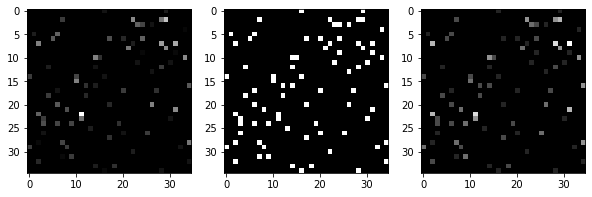

In [202]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(distance_matrix,'gray')
plt.subplot(1,3,2)
plt.imshow(adj_matrix,'gray')
plt.subplot(1,3,3)
plt.imshow(time_matrix,'gray')

Al final, se guardan estas matrices en documentos .csv para utilizar la información después.

In [207]:
data_distance = pd.DataFrame(distance_matrix)

In [208]:
data_distance

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,...,0.0,0.0,0.0,1200.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,0.0
5,0.0,300.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,900.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1600.0,0.0,0.0,1700.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0


In [209]:
data_time = pd.DataFrame(time_matrix)

In [210]:
data_time

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,7.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [211]:
data_time.to_csv(r'time_matrix.csv')

In [212]:
data_distance.to_csv(r'distance_matrix.csv')